# Q11 (Part 1)

In [75]:
import pandas as pd
from scipy.spatial import Delaunay
import numpy as np
import matplotlib.pyplot as plt

In [76]:
node_coordinates_df = pd.read_csv('mean_location_coordinates.txt', sep = "\t",header = None)
node_coordinates_df.columns = ['nodeID','Lon', 'Lat']

In [77]:
coordinate_matrix = node_coordinates_df.as_matrix(columns = ['Lon','Lat'])

In [78]:
coordinate_matrix

array([[-120.788685,   36.071629],
       [-122.219406,   37.469585],
       [-121.660215,   37.150476],
       ...,
       [-122.441149,   37.662688],
       [-121.563389,   38.567786],
       [-121.24364 ,   38.829312]])

In [79]:
tri = Delaunay(coordinate_matrix)

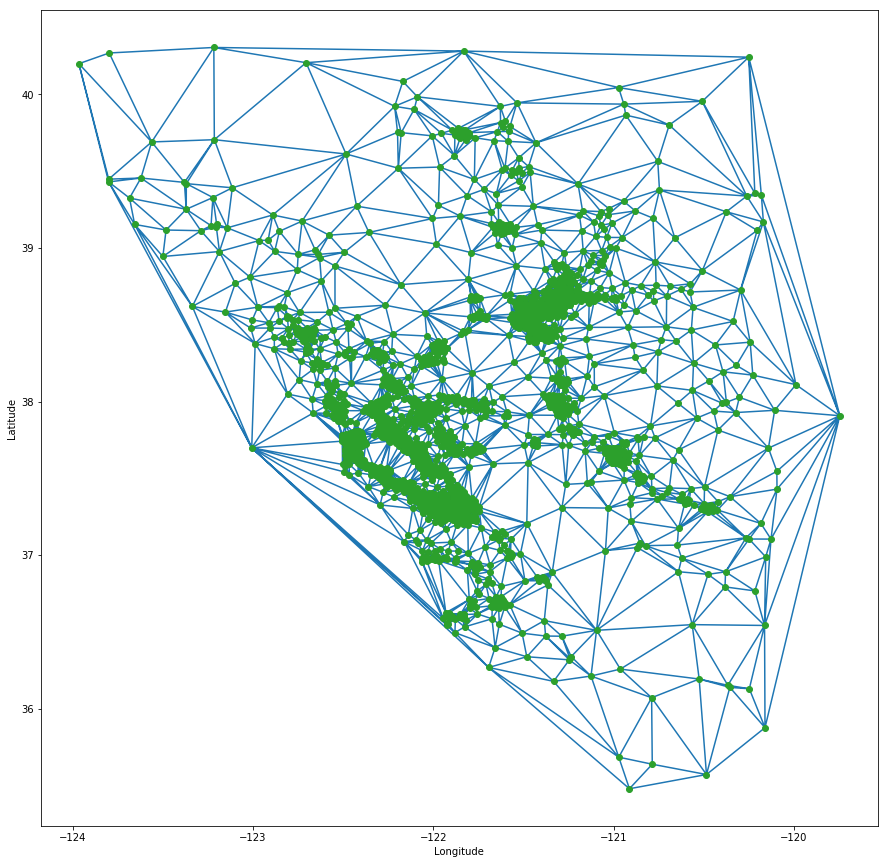

In [80]:
plt.figure(figsize=(15,15))
plt.triplot(coordinate_matrix[:,0], coordinate_matrix[:,1], tri.simplices.copy())
plt.plot(coordinate_matrix[:,0], coordinate_matrix[:,1], 'o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [81]:
(indices, indptr) = tri.vertex_neighbor_vertices

In [83]:
edge_list = []
for i in range(len(coordinate_matrix)):
    neighs = indptr[indices[i]:indices[i+1]]
    for neigh in neighs:
        if neigh > i:
            edge_list.append([i+1, neigh+1])


In [85]:
# Write edgelist into file
with open('triangulated_edge_list.txt','w') as f:
    for sdw in edge_list:
        f.write('%d\t%d\n'%(sdw[0],sdw[1]))